In [8]:
import numpy as np
from my_signal import Signal  
from functools import partial   

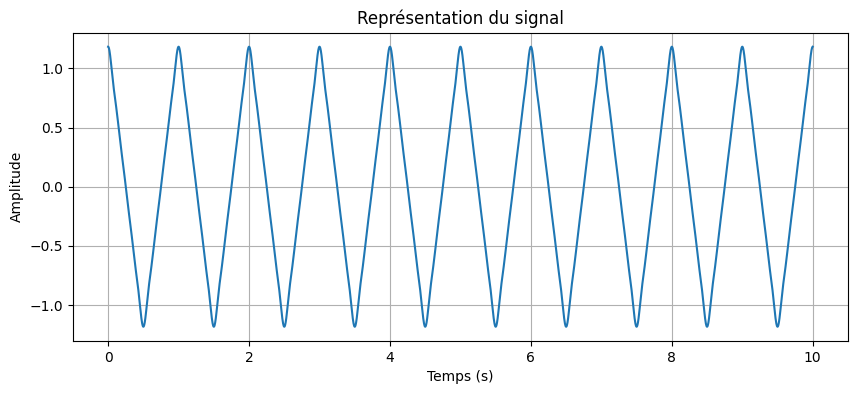

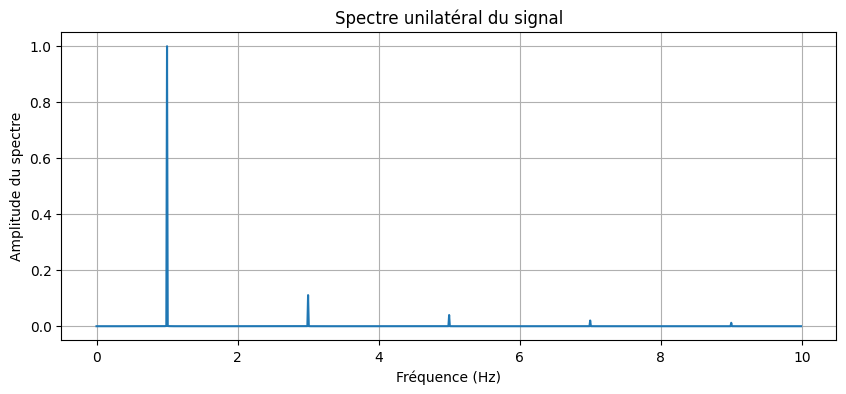

In [9]:
def e(lam, t):
    e = 0
    k_max = 4
    for k in range(k_max + 1):
        e += (1 / (2 * k + 1) ** 2) * np.cos((2 * k + 1) * 2 * np.pi * lam * t)
    return e

sampling_frequency = 1000
e1 = partial(e, 1)
signal_e = Signal(e1, sampling_frequency)

signal_e.plot(0, 10)
signal_e.spectrum(10, acquisition_duration=100, unilateral=True)

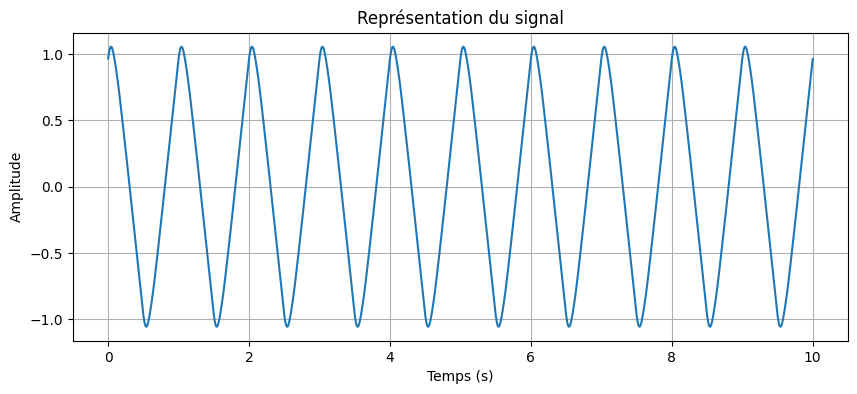

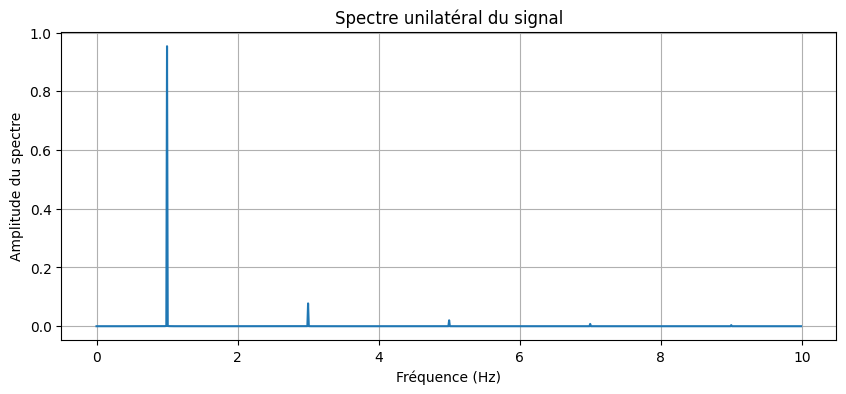

In [10]:
def h(lam, t):
    fc = (5 * lam) / np.sqrt(3)
    if t >= 0:
        return 2 * np.pi * fc * np.exp(-2 * np.pi * fc * t)
    else:
        return 0

h1 = partial(h, 1)
signal_h = Signal(h1, sampling_frequency)
# Signal de sortie
convolution_time = 100
signal_s = signal_e.convolution(signal_h, -convolution_time, 2 * convolution_time)

signal_s.plot(0, 10)
signal_s.spectrum(10, acquisition_duration=convolution_time, unilateral=True)